In [1]:
%%capture

!pip install tensorflow

In [2]:
%%capture
!pip install matplotlib-venn

In [3]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

In [9]:
# Load EEG data from CSV file
csv_file_path = '/content/Epileptic Seizure Recognition.csv'  # Replace with the actual path to your EEG data CSV file
eeg_data = pd.read_csv(csv_file_path)

In [10]:
print(eeg_data.keys())

Index(['Unnamed', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)


In [11]:
X = eeg_data.iloc[:, 1:-1].values

In [12]:
print(X)
X.shape

[[ 135  190  229 ... -116  -83  -51]
 [ 386  382  356 ...  154  143  129]
 [ -32  -39  -47 ...  -35  -35  -36]
 ...
 [  14    6  -13 ...   -2   -1   -8]
 [ -40  -25   -9 ...   68   59   55]
 [  29   41   57 ...   -2    2   20]]


(11500, 178)

In [13]:
y = eeg_data.iloc[:,-1:].values

In [ ]:
y = eeg_data.iloc[:,-1:].values
y[y>1] = 0
y.shape

(11500, 1)

In [14]:
y.shape

(11500, 1)

In [15]:
num_classes = len(np.unique(y))

In [16]:
print(y)

[[4]
 [1]
 [5]
 ...
 [5]
 [3]
 [4]]


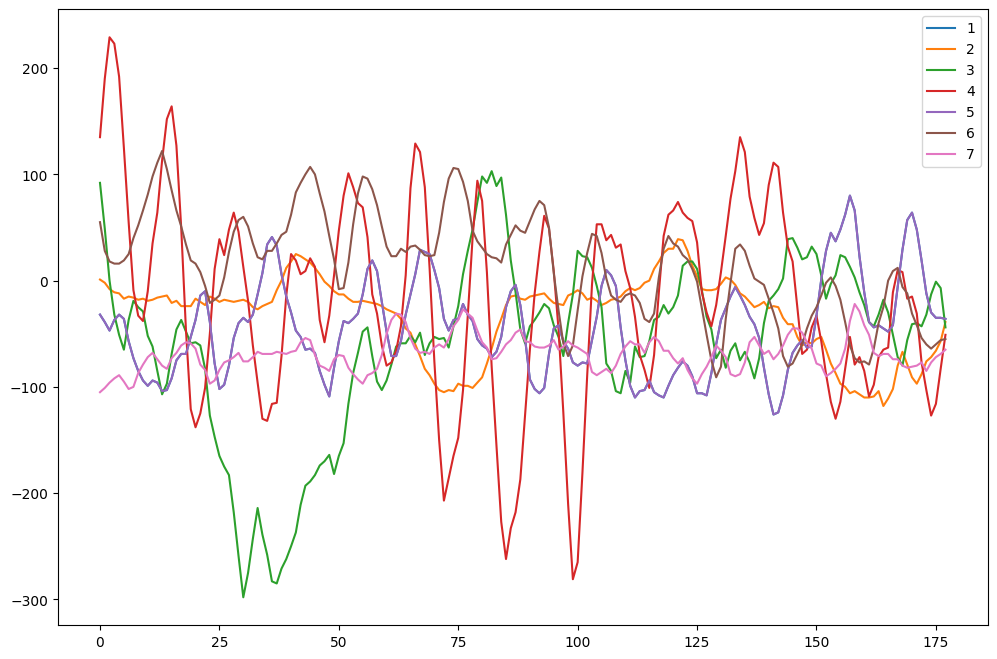

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(X[2,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.plot(X[5,:],label='6')
plt.plot(X[3,:],label='7')
plt.legend()
plt.show()

In [17]:
# Create an empty array to store the magnitude spectrum
magnitude_spectrum = np.zeros_like(X, dtype=np.float64)

In [18]:
for i in range(len(X)):
    row_vector = X[i, :]
    fft_result = np.fft.fft(row_vector)
    #fft_results[i,:] = fft_result
    magnitude_spectrum[i,:] = np.abs(fft_result)

In [19]:
magnitude_spectrum.shape

(11500, 178)

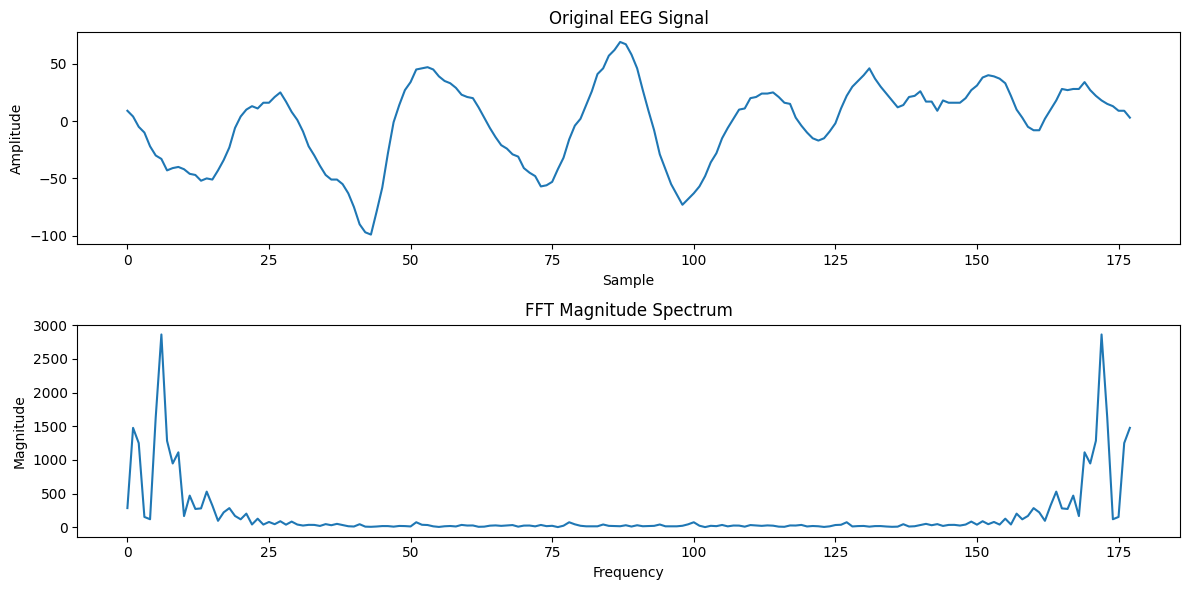

In [22]:
# Plot the original signal and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(X[17,:],label='1')
plt.title('Original EEG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(magnitude_spectrum[17,:], label=1)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

### training and testing fraction

In [ ]:
import pandas as pd
import numpy as np

def preprocess_data(eeg_data):
    # Convert non-numeric values to NaN and then replace with 0
    eeg_data = eeg_data.apply(pd.to_numeric, errors='coerce').fillna(0)
    return eeg_data

def augment_data(eeg_data):
    augmented_data = []
    augmented_levels = []  # List to store corresponding levels for augmented data
    for index, row in eeg_data.iterrows():
        # Extract level from the original data
        level = row['y']  # Replace 'your_level_column_name' with the correct column name

        # Convert row to numpy array
        sample = row.drop('y').values

        # Perform augmentation techniques here (e.g., time-shift, noise injection, scaling)

        # Example: Time-shift by randomly shifting the signal by a few samples
        timeshifted = np.roll(sample, np.random.randint(len(sample)))

        # Example: Add random noise to the signal
        noise = np.random.normal(0, 0.1, len(sample))
        noised = sample + noise

        # Example: Scale the magnitude of the signal by a random factor
        scaling_factor = np.random.uniform(0.5, 1.5)
        scaled = sample * scaling_factor

        # Append augmented samples to the augmented_data list
        augmented_data.extend([timeshifted, noised, scaled])
        # Append corresponding levels to augmented_levels list
        augmented_levels.extend([level, level, level])

    return np.array(augmented_data), np.array(augmented_levels)

# Load EEG data from CSV file
csv_file_path = '/content/Epileptic Seizure Recognition.csv'  # Replace with the actual path to your EEG data CSV file
eeg_data = pd.read_csv(csv_file_path)
# Remove unnamed column
eeg_data = eeg_data.loc[:, ~eeg_data.columns.str.contains('^Unnamed')]

# Preprocess EEG data to handle non-numeric values
eeg_data = preprocess_data(eeg_data)

# Apply data augmentation
augmented_eeg_data, augmented_levels = augment_data(eeg_data)

# Print shape of augmented data and levels
print("Augmented data shape:", augmented_eeg_data.shape)
print("Augmented levels shape:", augmented_levels.shape)

import numpy as np

# Assuming augmented_levels is your array with shape (34500,)
augmented_levels = augmented_levels.reshape(-1, 1)

# Print the new shape
print("New shape:", augmented_levels.shape)

Augmented data shape: (34500, 178)
Augmented levels shape: (34500,)
New shape: (34500, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(augmented_eeg_data,augmented_levels,test_size=0.1,shuffle=True)
X_train.shape,y_test.shape

((31050, 178), (3450, 1))

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(magnitude_spectrum, y, test_size=0.10, shuffle=True)

In [ ]:
# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [ ]:
# Reshape the data to comply with the 3D input shape expected by Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [ ]:
X_train.shape,X_test.shape, X_val.shape

((8280, 178, 1), (1150, 178, 1), (2070, 178, 1))

In [ ]:
y_train=y_train-1
y_test = y_test -1
y_val=y_val-1


In [ ]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=5)

In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
#from keras.utils import np_utils
from keras.layers import Dense, Activation,Conv1D,MaxPooling1D, Dropout, Flatten
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, Lambda, Activation, Concatenate

def attention_block(inputs):
    x = Conv1D(filters=1, kernel_size=3, padding='same', activation='sigmoid')(inputs)
    x = Lambda(lambda x: x[0] * x[1])([inputs, x])
    return x

input_shape = (178, 1)
inputs = Input(shape=input_shape)

# Attention block
attention_output = attention_block(inputs)

# Additional convolutional layers
x = Conv1D(filters=256, kernel_size=3, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)
x = Conv1D(filters=32, kernel_size=3, activation='relu')(x)
x = Dropout(0.3)(x)

x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)

# Concatenate attention output before final layers
x = Concatenate()([x, Flatten()(attention_output)])

# Final dense layers
x = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 178, 1)]             0         []                            
                                                                                                  
 conv1d_1 (Conv1D)           (None, 176, 256)             1024      ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 176, 256)             0         ['conv1d_1[0][0]']            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 174, 128)             98432     ['dropout[0][0]']             
                                                                                              

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout, Flatten, Dense

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        return context_vector

def custom_model(x):
    x = Conv1D(256, 3, activation='relu', input_shape=(178,1), padding='same')(x)
    x = MaxPool1D(2)(x)
    x = Dropout(0.2)(x)
    attention_output_1 = AttentionLayer(units=128)(x)

    # Add encoder layers
    x = Conv1D(128, 3, activation='relu', padding='same')(attention_output_1)
    x = MaxPool1D(2)(x)
    x = Dropout(0.2)(x)

    x = Flatten()(x)
    x = Dense(250, activation='relu')(x)
    x = Dense(5, activation='softmax')(x)
    return x

# Define the input shape
input_shape = (178, 1)
inputs = tf.keras.layers.Input(shape=input_shape)

# Build the model
outputs = custom_model(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 178, 1)]          0         
                                                                 
 conv1d_8 (Conv1D)           (None, 178, 256)          1024      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 89, 256)           0         
 g1D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 89, 256)           0         
                                                                 
 attention_layer_1 (Attenti  (None, 89, 256)           33025     
 onLayer)                                                        
                                                                 
 conv1d_9 (Conv1D)           (None, 89, 128)           9843

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
259/259 [==============================] - 46s 159ms/step - loss: 1.0237 - accuracy: 0.5921 - val_loss: 0.5920 - val_accuracy: 0.7401
Epoch 2/50
259/259 [==============================] - 33s 128ms/step - loss: 0.5738 - accuracy: 0.7331 - val_loss: 0.4976 - val_accuracy: 0.7734
Epoch 3/50
259/259 [==============================] - 34s 132ms/step - loss: 0.5116 - accuracy: 0.7533 - val_loss: 0.5149 - val_accuracy: 0.7348
Epoch 4/50
259/259 [==============================] - 34s 132ms/step - loss: 0.4928 - accuracy: 0.7681 - val_loss: 0.4549 - val_accuracy: 0.7995
Epoch 5/50
259/259 [==============================] - 33s 128ms/step - loss: 0.4789 - accuracy: 0.7651 - val_loss: 0.4337 - val_accuracy: 0.8034
Epoch 6/50
259/259 [==============================] - 35s 136ms/step - loss: 0.4598 - accuracy: 0.7807 - val_loss: 0.4284 - val_accuracy: 0.8010
Epoch 7/50
259/259 [==============================] - 33s 127ms/step - loss: 0.4739 - accuracy: 0.7713 - val_loss: 0.4107 - val_ac

Epoch 1/50
259/259 [==============================] - 36s 132ms/step - loss: 1.0127 - accuracy: 0.5949 - val_loss: 0.6185 - val_accuracy: 0.7290
Epoch 2/50
259/259 [==============================] - 33s 126ms/step - loss: 0.5921 - accuracy: 0.7211 - val_loss: 0.4731 - val_accuracy: 0.7792
Epoch 3/50
259/259 [==============================] - 34s 131ms/step - loss: 0.5175 - accuracy: 0.7506 - val_loss: 0.4494 - val_accuracy: 0.7884
Epoch 4/50
259/259 [==============================] - 34s 130ms/step - loss: 0.5054 - accuracy: 0.7589 - val_loss: 0.5051 - val_accuracy: 0.7662
Epoch 5/50
259/259 [==============================] - 33s 127ms/step - loss: 0.4867 - accuracy: 0.7664 - val_loss: 0.4628 - val_accuracy: 0.7807
Epoch 6/50
259/259 [==============================] - 37s 142ms/step - loss: 0.4691 - accuracy: 0.7678 - val_loss: 0.4547 - val_accuracy: 0.7903
Epoch 7/50
259/259 [==============================] - 34s 130ms/step - loss: 0.4514 - accuracy: 0.7814 - val_loss: 0.4004 - val_ac

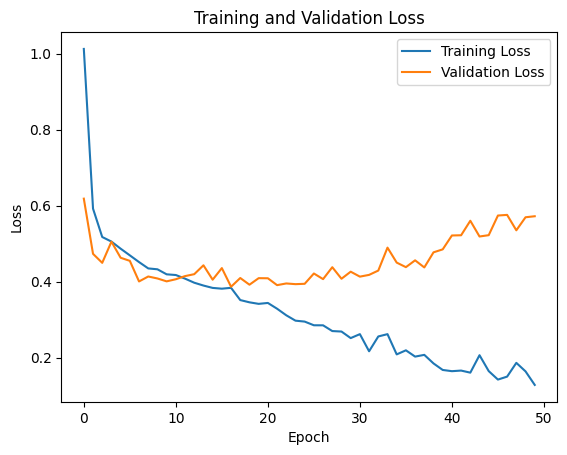

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

36/36 [==============================] - 1s 27ms/step - loss: 0.6079 - accuracy: 0.8226


[0.6079490780830383, 0.8226087093353271]

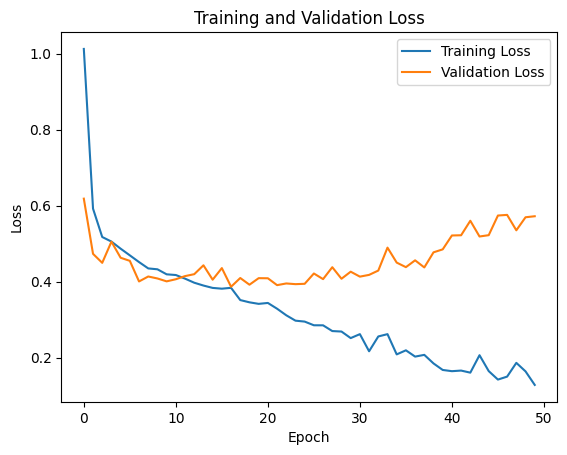

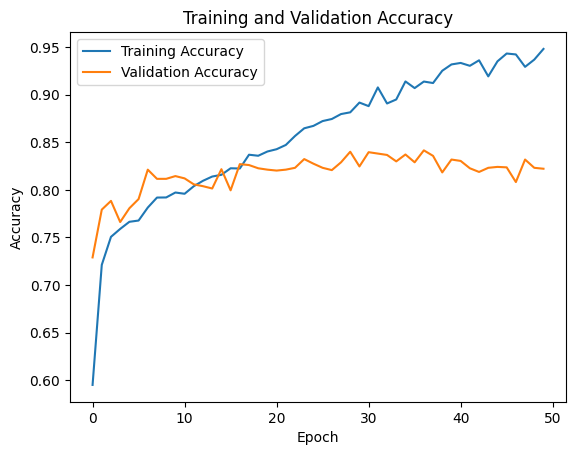

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 5)).


In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Flatten, Dense, Input, Attention, Concatenate
from keras.models import Model

In [ ]:
import tensorflow as tf
#from tensorflow.keras.layers import Conv1D, MaxPooling2D, Flatten, Dense, Input, Attention, Add, Concatenate
from tensorflow.keras import layers, models
from keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Flatten, Dense, Input, Attention, Concatenate
from keras.models import Model

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        return context_vector

# Define the 1D CNN model with attention
input_layer = layers.Input(shape=(178, 1))
conv1d_layer = layers.Conv1D(32, kernel_size=4, activation='relu')(input_layer)
maxpooling_layer = layers.MaxPooling1D(pool_size=2)(conv1d_layer)
conv1d_layer2 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer)

# Apply attention layer after the 2nd step
attention_output = AttentionLayer(64)(conv1d_layer2)

# Concatenate attention output with the output of the 2nd convolutional layer
#concatenated_output = layers.Concatenate(axis=1)([conv1d_layer2, attention_output])

# Additional layers
maxpooling_layer2 = layers.MaxPooling1D(pool_size=2)(attention_output)
conv1d_layer3 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer2)
global_avg_pooling_layer = layers.GlobalAveragePooling1D()(conv1d_layer3)
dense_layer = layers.Dense(64, activation='relu')(global_avg_pooling_layer)

dense_layer_64 = Flatten()(x)
# LSTM layers
x = tf.keras.layers.Reshape((64, 1))(dense_layer)  # Reshape the input to add a time step dimension
x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
x = tf.keras.layers.LSTM(32)(x)
dense_layer_64 = tf.keras.layers.Flatten()(x)

# Final dense layer
concatenated_output = Concatenate()([dense_layer_64, Flatten()(attention_output)])
#concatenated_output = layers.Concatenate(axis=1)([dense_layer_64, attention_output])
dense_layer_64 = layers.Dense(32, activation='relu')(concatenated_output)
output_layer = layers.Dense(5, activation='softmax')(dense_layer_64)

# Define the model
model = models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 178, 1)]             0         []                            
                                                                                                  
 conv1d_30 (Conv1D)          (None, 175, 32)              160       ['input_9[0][0]']             
                                                                                                  
 max_pooling1d_14 (MaxPooli  (None, 87, 32)               0         ['conv1d_30[0][0]']           
 ng1D)                                                                                            
                                                                                                  
 conv1d_31 (Conv1D)          (None, 85, 64)               6208      ['max_pooling1d_14[0][0]

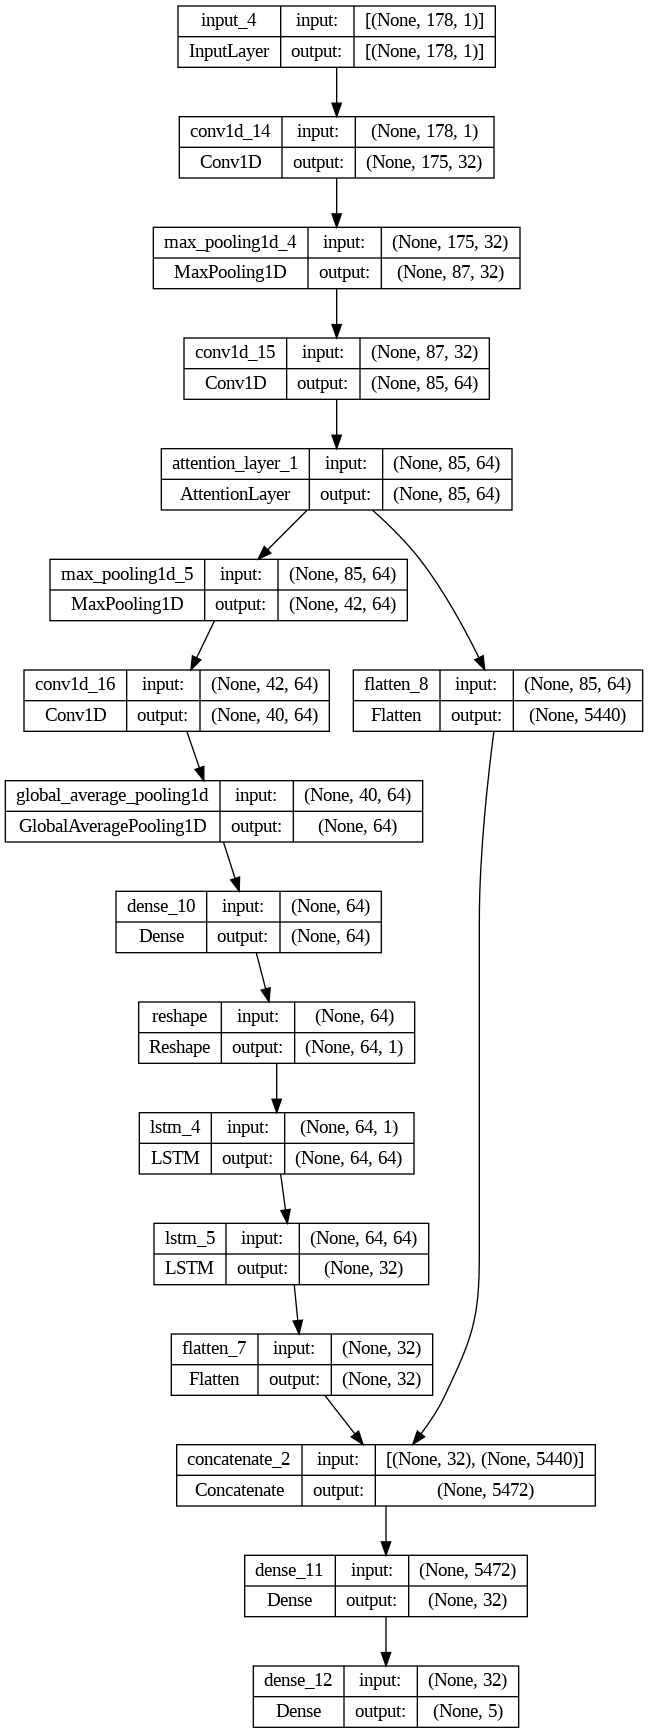

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
259/259 [==============================] - 32s 91ms/step - loss: 0.7597 - accuracy: 0.6675 - val_loss: 0.5880 - val_accuracy: 0.7314
Epoch 2/50
259/259 [==============================] - 23s 88ms/step - loss: 0.5387 - accuracy: 0.7588 - val_loss: 0.5214 - val_accuracy: 0.7618
Epoch 3/50
259/259 [==============================] - 20s 79ms/step - loss: 0.4870 - accuracy: 0.7734 - val_loss: 0.4874 - val_accuracy: 0.7720
Epoch 4/50
259/259 [==============================] - 23s 88ms/step - loss: 0.4578 - accuracy: 0.7886 - val_loss: 0.5390 - val_accuracy: 0.7589
Epoch 5/50
259/259 [==============================] - 21s 82ms/step - loss: 0.4495 - accuracy: 0.7932 - val_loss: 0.5411 - val_accuracy: 0.7527
Epoch 6/50
259/259 [==============================] - 21s 80ms/step - loss: 0.4281 - accuracy: 0.7978 - val_loss: 0.5161 - val_accuracy: 0.7657
Epoch 7/50
259/259 [==============================] - 23s 89ms/step - loss: 0.4165 - accuracy: 0.8107 - val_loss: 0.4640 - val_accuracy:

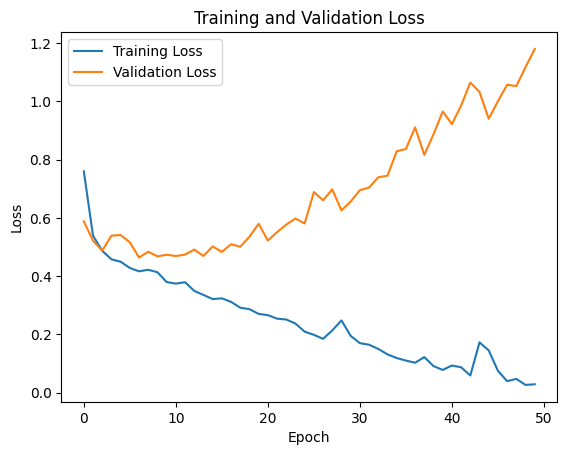

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

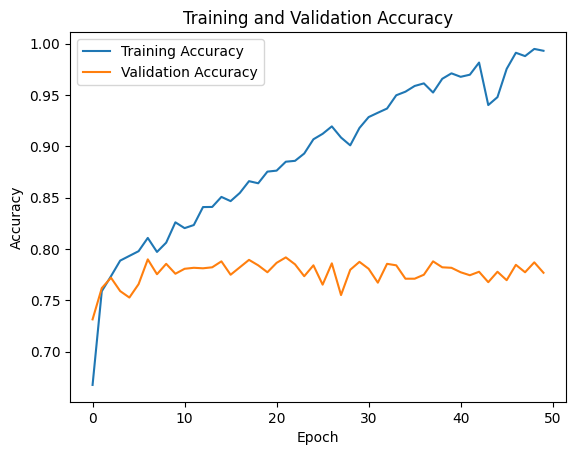

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
#from tensorflow.keras.layers import Conv1D, MaxPooling2D, Flatten, Dense, Input, Attention, Add, Concatenate
from tensorflow.keras import layers, models
from keras.layers import Conv1D, MaxPool1D, Dropout, LSTM, Flatten, Dense, Input, Attention, Concatenate
from keras.models import Model

In [ ]:
model = Sequential()
model.add(Conv1D(256, 3, activation='relu', input_shape=(178,1), padding='same'))
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu', padding='same'))
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))

model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 178, 256)          1024      
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 89, 256)           0         
 ng1D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 89, 256)           0         
                                                                 
 conv1d_27 (Conv1D)          (None, 89, 128)           98432     
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 44, 128)           0         
 ng1D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 44, 128)          

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/72
259/259 [==============================] - 40s 154ms/step - loss: 0.4636 - accuracy: 0.7865 - val_loss: 0.4550 - val_accuracy: 0.7899
Epoch 2/72
259/259 [==============================] - 28s 109ms/step - loss: 0.4758 - accuracy: 0.7798 - val_loss: 0.4582 - val_accuracy: 0.7879
Epoch 3/72
259/259 [==============================] - 30s 115ms/step - loss: 0.4521 - accuracy: 0.7908 - val_loss: 0.4410 - val_accuracy: 0.7923
Epoch 4/72
259/259 [==============================] - 28s 109ms/step - loss: 0.4706 - accuracy: 0.7872 - val_loss: 0.4514 - val_accuracy: 0.7995
Epoch 5/72
259/259 [==============================] - 30s 114ms/step - loss: 0.4611 - accuracy: 0.7886 - val_loss: 0.4443 - val_accuracy: 0.8010
Epoch 6/72
259/259 [==============================] - 30s 117ms/step - loss: 0.4407 - accuracy: 0.7963 - val_loss: 0.4266 - val_accuracy: 0.8058
Epoch 7/72
259/259 [==============================] - 30s 116ms/step - loss: 0.4306 - accuracy: 0.8016 - val_loss: 0.4309 - val_ac

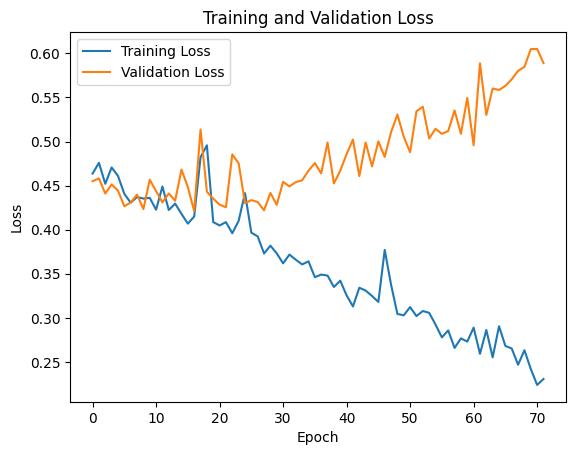

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=72, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/72
259/259 [==============================] - 27s 102ms/step - loss: 0.4007 - accuracy: 0.8198 - val_loss: 0.4159 - val_accuracy: 0.8188
Epoch 2/72
259/259 [==============================] - 29s 113ms/step - loss: 0.3828 - accuracy: 0.8315 - val_loss: 0.4142 - val_accuracy: 0.8213
Epoch 3/72
259/259 [==============================] - 32s 123ms/step - loss: 0.3900 - accuracy: 0.8249 - val_loss: 0.3970 - val_accuracy: 0.8213
Epoch 4/72
259/259 [==============================] - 27s 105ms/step - loss: 0.3871 - accuracy: 0.8229 - val_loss: 0.4266 - val_accuracy: 0.8121
Epoch 5/72
259/259 [==============================] - 26s 101ms/step - loss: 0.4141 - accuracy: 0.8215 - val_loss: 0.4243 - val_accuracy: 0.8077
Epoch 6/72
259/259 [==============================] - 26s 101ms/step - loss: 0.3921 - accuracy: 0.8248 - val_loss: 0.4410 - val_accuracy: 0.8034
Epoch 7/72
259/259 [==============================] - 27s 106ms/step - loss: 0.3885 - accuracy: 0.8246 - val_loss: 0.4239 - val_ac

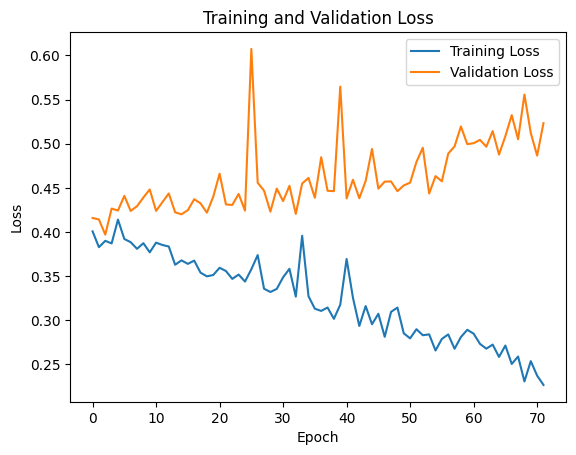

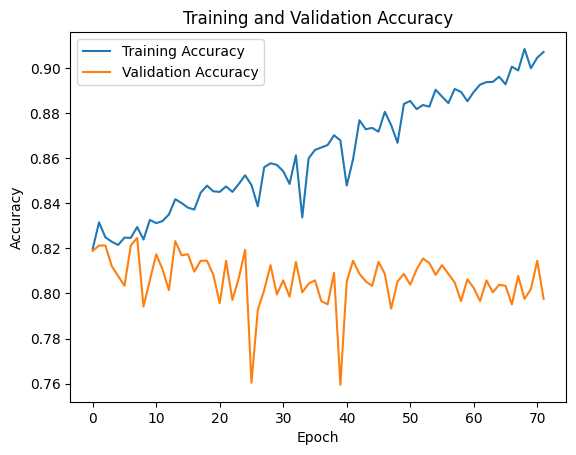

In [ ]:
    import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)

    #print("Test Accuracy for learning rate {}: {:.2f}%".format(test_accuracy * 100))

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
import tensorflow as tf
#from tensorflow.keras.layers import Conv1D, MaxPooling2D, Flatten, Dense, Input, Attention, Add, Concatenate
from tensorflow.keras import layers, models
from keras.layers import Conv1D, MaxPool1D, Dropout, LSTM, Flatten, Dense, Input, Attention, Concatenate
from keras.models import Model

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(178,1), return_sequences=True))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(250, activation='relu'))

model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 178, 64)           16896     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 250)               8250      
                                                                 
 dense_7 (Dense)             (None, 5)                 1255      
                                                                 
Total params: 38817 (151.63 KB)
Trainable params: 38817 (151.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


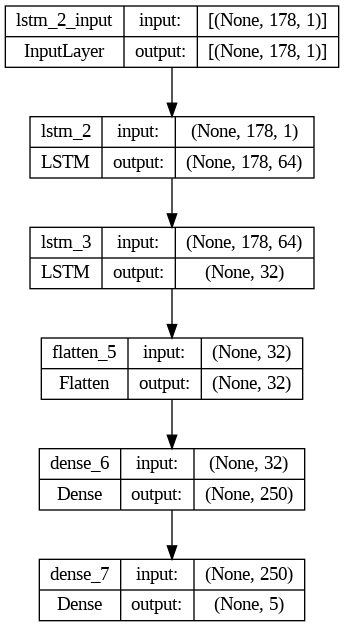

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/100
65/65 - 31s - loss: 1.3406 - accuracy: 0.3998 - val_loss: 1.1174 - val_accuracy: 0.5193 - 31s/epoch - 477ms/step
Epoch 2/100
65/65 - 27s - loss: 1.0111 - accuracy: 0.5498 - val_loss: 0.9402 - val_accuracy: 0.5937 - 27s/epoch - 413ms/step
Epoch 3/100
65/65 - 32s - loss: 0.8330 - accuracy: 0.6094 - val_loss: 0.7784 - val_accuracy: 0.6478 - 32s/epoch - 499ms/step
Epoch 4/100
65/65 - 27s - loss: 0.7147 - accuracy: 0.6598 - val_loss: 0.7627 - val_accuracy: 0.6469 - 27s/epoch - 416ms/step
Epoch 5/100
65/65 - 29s - loss: 0.6739 - accuracy: 0.6861 - val_loss: 0.7025 - val_accuracy: 0.6778 - 29s/epoch - 448ms/step
Epoch 6/100
65/65 - 35s - loss: 0.6652 - accuracy: 0.6827 - val_loss: 0.6388 - val_accuracy: 0.7106 - 35s/epoch - 533ms/step
Epoch 7/100
65/65 - 33s - loss: 0.6435 - accuracy: 0.6967 - val_loss: 0.6253 - val_accuracy: 0.7159 - 33s/epoch - 513ms/step
Epoch 8/100
65/65 - 33s - loss: 0.6615 - accuracy: 0.6900 - val_loss: 0.6246 - val_accuracy: 0.7237 - 33s/epoch - 502ms/step


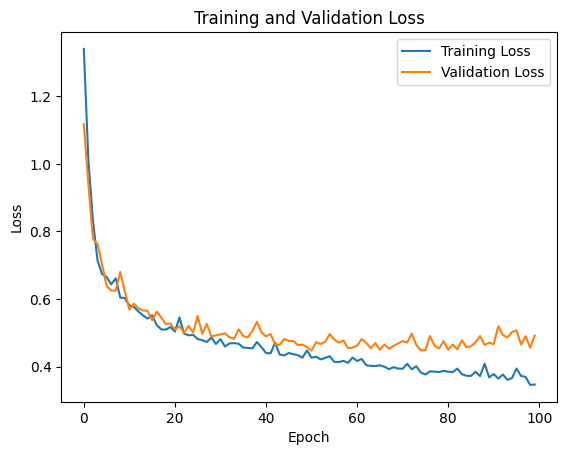

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=2, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense

import tensorflow as tf
from tensorflow.keras import layers

class MultiHeadAttention(layers.Layer):
    def __init__(self, input_size, num_heads=8):
        super(MultiHeadAttention, self).__init__()

        assert input_size % num_heads == 0, "Input size must be divisible by the number of heads"

        self.input_size = input_size
        self.num_heads = num_heads
        self.head_dim = input_size // num_heads

        self.query = layers.Dense(input_size)
        self.key = layers.Dense(input_size)
        self.value = layers.Dense(input_size)

        self.fc_out = layers.Dense(input_size)

    def call(self, x):
        batch_size, seq_len, _ = tf.unstack(tf.shape(x))
        query = tf.reshape(self.query(x), [batch_size, seq_len, self.num_heads, self.head_dim])
        key = tf.reshape(self.key(x), [batch_size, seq_len, self.num_heads, self.head_dim])
        value = tf.reshape(self.value(x), [batch_size, seq_len, self.num_heads, self.head_dim])

        query = tf.transpose(query, perm=[0, 2, 1, 3])
        key = tf.transpose(key, perm=[0, 2, 1, 3])
        value = tf.transpose(value, perm=[0, 2, 1, 3])

        energy = tf.matmul(query, key, transpose_b=True) / tf.math.sqrt(tf.cast(self.head_dim, dtype=tf.float32))
        attention = tf.nn.softmax(energy, axis=-1)
        attention = tf.matmul(attention, value)

        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        attention = tf.reshape(attention, [batch_size, seq_len, self.input_size])
        out = self.fc_out(attention)

        return out


model = Sequential()
model.add(LSTM(64, input_shape=(178,1), return_sequences=True))
model.add(MultiHeadAttention(64))  # Replace one LSTM layer with MultiHeadAttention
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 178, 64)           16896     
                                                                 
 multi_head_attention_6 (Mu  (None, 178, 64)           16640     
 ltiHeadAttention)                                               
                                                                 
 flatten_2 (Flatten)         (None, 11392)             0         
                                                                 
 dense_32 (Dense)            (None, 250)               2848250   
                                                                 
 dense_33 (Dense)            (None, 5)                 1255      
                                                                 
Total params: 2883041 (11.00 MB)
Trainable params: 2883041 (11.00 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense

model = Sequential()
model.add(LSTM(32, input_shape=(178, 1), return_sequences=True))  # Reduced LSTM size
model.add(MultiHeadAttention(32))  # Use smaller size for MultiHeadAttention
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Reduced Dense layer size
model.add(Dense(5, activation='softmax'))

model.summary()


NameError: name 'MultiHeadAttention' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense, LayerNormalization

model = Sequential()
model.add(LSTM(32, input_shape=(178, 1), return_sequences=True))
model.add(MultiHeadAttention(32))
model.add(LayerNormalization())  # Add LayerNormalization after MultiHeadAttention
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(LayerNormalization())  # Add LayerNormalization after Dense layer
model.add(Dense(5, activation='softmax'))

model.summary()


NameError: name 'MultiHeadAttention' is not defined

In [ ]:
# Compile the model
#from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size= 64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
130/130 [==============================] - 79s 531ms/step - loss: 1.5180 - accuracy: 0.3623 - val_loss: 1.1997 - val_accuracy: 0.4657
Epoch 2/50
130/130 [==============================] - 69s 528ms/step - loss: 1.1057 - accuracy: 0.5064 - val_loss: 1.0507 - val_accuracy: 0.5082
Epoch 3/50
130/130 [==============================] - 70s 541ms/step - loss: 1.0327 - accuracy: 0.5365 - val_loss: 1.0106 - val_accuracy: 0.5401
Epoch 4/50
130/130 [==============================] - 67s 513ms/step - loss: 0.9785 - accuracy: 0.5560 - val_loss: 0.9374 - val_accuracy: 0.5749
Epoch 5/50
130/130 [==============================] - 66s 506ms/step - loss: 0.8963 - accuracy: 0.5866 - val_loss: 0.9976 - val_accuracy: 0.5570
Epoch 6/50
130/130 [==============================] - 70s 539ms/step - loss: 0.8086 - accuracy: 0.6337 - val_loss: 0.6919 - val_accuracy: 0.7048
Epoch 7/50
130/130 [==============================] - 65s 499ms/step - loss: 0.6704 - accuracy: 0.6925 - val_loss: 0.6428 - val_ac

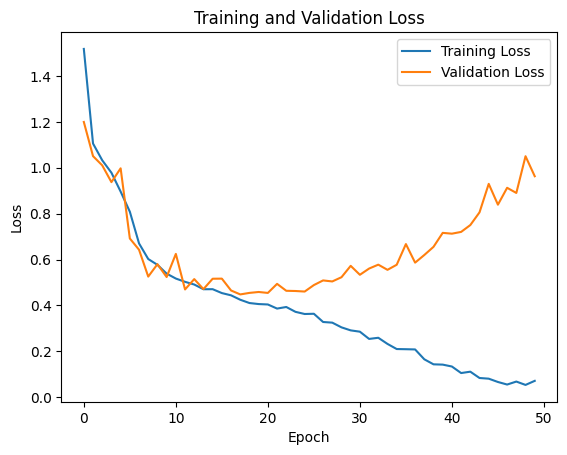

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=50, batch_size= 64, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
from keras.layers import Conv1D, MaxPool1D, Dropout, LSTM, Flatten, Dense, Input, Attention, Concatenate
from keras.models import Model

In [ ]:
model = Sequential()
model.add(Conv1D(256, 3, activation='relu', input_shape=(178, 1), padding='same'))
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu', padding='same'))
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 178, 256)          1024      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 89, 256)           0         
 g1D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 89, 256)           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 89, 128)           98432     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 44, 128)           0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 44, 128)         

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/100
130/130 [==============================] - 61s 258ms/step - loss: 1.5581 - accuracy: 0.2684 - val_loss: 1.4007 - val_accuracy: 0.4179
Epoch 2/100
130/130 [==============================] - 32s 245ms/step - loss: 1.3914 - accuracy: 0.3694 - val_loss: 1.3321 - val_accuracy: 0.4565
Epoch 3/100
130/130 [==============================] - 31s 239ms/step - loss: 1.1558 - accuracy: 0.4751 - val_loss: 0.8781 - val_accuracy: 0.5928
Epoch 4/100
130/130 [==============================] - 34s 264ms/step - loss: 0.9028 - accuracy: 0.5851 - val_loss: 0.7785 - val_accuracy: 0.6411
Epoch 5/100
130/130 [==============================] - 31s 237ms/step - loss: 0.7912 - accuracy: 0.6243 - val_loss: 0.6997 - val_accuracy: 0.6961
Epoch 6/100
130/130 [==============================] - 31s 238ms/step - loss: 0.7466 - accuracy: 0.6501 - val_loss: 0.6249 - val_accuracy: 0.7087
Epoch 7/100
130/130 [==============================] - 31s 237ms/step - loss: 0.6810 - accuracy: 0.6795 - val_loss: 0.5904 -

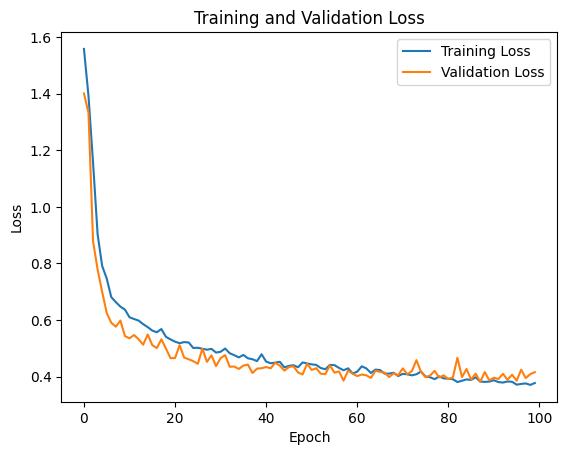

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=100, batch_size= 64, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
#from tensorflow.keras.layers import Conv1D, MaxPooling2D, Flatten, Dense, Input, Attention, Add, Concatenate
from tensorflow.keras import layers, models
from keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Flatten, Dense, Input, Attention, Concatenate
from keras.models import Model

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        return context_vector

# Define the 1D CNN model with attention
input_layer = layers.Input(shape=(178, 1))
conv1d_layer = layers.Conv1D(32, kernel_size=4, activation='relu')(input_layer)
maxpooling_layer = layers.MaxPooling1D(pool_size=2)(conv1d_layer)
conv1d_layer2 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer)

# Apply attention layer after the 2nd step
attention_output = AttentionLayer(64)(conv1d_layer2)

# Concatenate attention output with the output of the 2nd convolutional layer
#concatenated_output = layers.Concatenate(axis=1)([conv1d_layer2, attention_output])

# Additional layers
maxpooling_layer2 = layers.MaxPooling1D(pool_size=2)(attention_output)
conv1d_layer3 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer2)
global_avg_pooling_layer = layers.GlobalAveragePooling1D()(conv1d_layer3)
dense_layer = layers.Dense(64, activation='relu')(global_avg_pooling_layer)

# Add Dense layer of size 64 before the final output
dense_layer_64 = layers.Dense(64, activation='relu')(dense_layer)
dense_layer_64 = Flatten()(dense_layer_64)
# Final dense layer
concatenated_output = Concatenate()([dense_layer_64, Flatten()(attention_output)])
#concatenated_output = layers.Concatenate(axis=1)([dense_layer_64, attention_output])
dense_layer_64 = layers.Dense(32, activation='relu')(concatenated_output)
output_layer = layers.Dense(5, activation='softmax')(dense_layer_64)

# Define the model
model = models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 178, 1)]             0         []                            
                                                                                                  
 conv1d_38 (Conv1D)          (None, 175, 32)              160       ['input_12[0][0]']            
                                                                                                  
 max_pooling1d_24 (MaxPooli  (None, 87, 32)               0         ['conv1d_38[0][0]']           
 ng1D)                                                                                            
                                                                                                  
 conv1d_39 (Conv1D)          (None, 85, 64)               6208      ['max_pooling1d_24[0][0

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
259/259 [==============================] - 35s 108ms/step - loss: 0.8123 - accuracy: 0.6540 - val_loss: 0.5919 - val_accuracy: 0.7440
Epoch 2/50
259/259 [==============================] - 26s 99ms/step - loss: 0.5805 - accuracy: 0.7295 - val_loss: 0.5552 - val_accuracy: 0.7444
Epoch 3/50
259/259 [==============================] - 26s 101ms/step - loss: 0.5257 - accuracy: 0.7502 - val_loss: 0.4918 - val_accuracy: 0.7691
Epoch 4/50
259/259 [==============================] - 25s 95ms/step - loss: 0.4877 - accuracy: 0.7610 - val_loss: 0.4825 - val_accuracy: 0.7667
Epoch 5/50
259/259 [==============================] - 25s 96ms/step - loss: 0.4674 - accuracy: 0.7733 - val_loss: 0.4684 - val_accuracy: 0.7676
Epoch 6/50
259/259 [==============================] - 26s 99ms/step - loss: 0.4566 - accuracy: 0.7771 - val_loss: 0.4686 - val_accuracy: 0.7700
Epoch 7/50
259/259 [==============================] - 25s 96ms/step - loss: 0.4501 - accuracy: 0.7801 - val_loss: 0.4765 - val_accurac

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        return context_vector

# Define the 1D CNN model with attention
input_layer = layers.Input(shape=(178, 1))

# First branch
conv1d_layer1 = layers.Conv1D(32, kernel_size=4, activation='relu')(input_layer)
maxpooling_layer1 = layers.MaxPooling1D(pool_size=2)(conv1d_layer1)
conv1d_layer2 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer1)
attention_output1 = AttentionLayer(64)(conv1d_layer2)

# Second branch
conv1d_layer3 = layers.Conv1D(64, kernel_size=3, activation='relu')(input_layer)
maxpooling_layer2 = layers.MaxPooling1D(pool_size=2)(conv1d_layer3)
conv1d_layer4 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer2)
attention_output2 = AttentionLayer(64)(conv1d_layer4)

# Third branch
conv1d_layer5 = layers.Conv1D(64, kernel_size=3, activation='relu')(input_layer)
maxpooling_layer3 = layers.MaxPooling1D(pool_size=2)(conv1d_layer5)
conv1d_layer6 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer3)
attention_output3 = AttentionLayer(64)(conv1d_layer6)

# Pad or truncate sequences to have the same length
attention_output1 = layers.ZeroPadding1D(padding=(1, 2))(attention_output1)
attention_output3 = layers.ZeroPadding1D(padding=(1, 2))(attention_output3)

# Concatenate the outputs of the three branches
concatenated_output = layers.Concatenate(axis=1)([attention_output1, attention_output2, attention_output3])
dense_layer_64 = layers.Flatten()(concatenated_output)

dense_layer = layers.Dense(512, activation='relu')(dense_layer_64 )
dense_layer = layers.LayerNormalization()(dense_layer)
dense_layer = layers.Dropout(0.2)(dense_layer)
dense_layer = layers.Activation('relu')(dense_layer)

dense_layer = layers.Dense(256, activation=None)(dense_layer)
dense_layer = layers.LayerNormalization()(dense_layer)
dense_layer = layers.Dropout(0.2)(dense_layer)
dense_layer = layers.Activation('relu')(dense_layer)

dense_layer = layers.Dense(128, activation=None)(dense_layer )
dense_layer = layers.LayerNormalization()(dense_layer)
dense_layer = layers.Dropout(0.2)(dense_layer)
dense_layer = layers.Activation('relu')(dense_layer)


# Final dense layer
output_layer = layers.Dense(5, activation='softmax')(dense_layer)

# Define the model
model = models.Model(inputs=input_layer, outputs=output_layer)

model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 178, 1)]             0         []                            
                                                                                                  
 conv1d_16 (Conv1D)          (None, 175, 32)              160       ['input_5[0][0]']             
                                                                                                  
 conv1d_20 (Conv1D)          (None, 176, 64)              256       ['input_5[0][0]']             
                                                                                                  
 max_pooling1d_8 (MaxPoolin  (None, 87, 32)               0         ['conv1d_16[0][0]']           
 g1D)                                                                                       

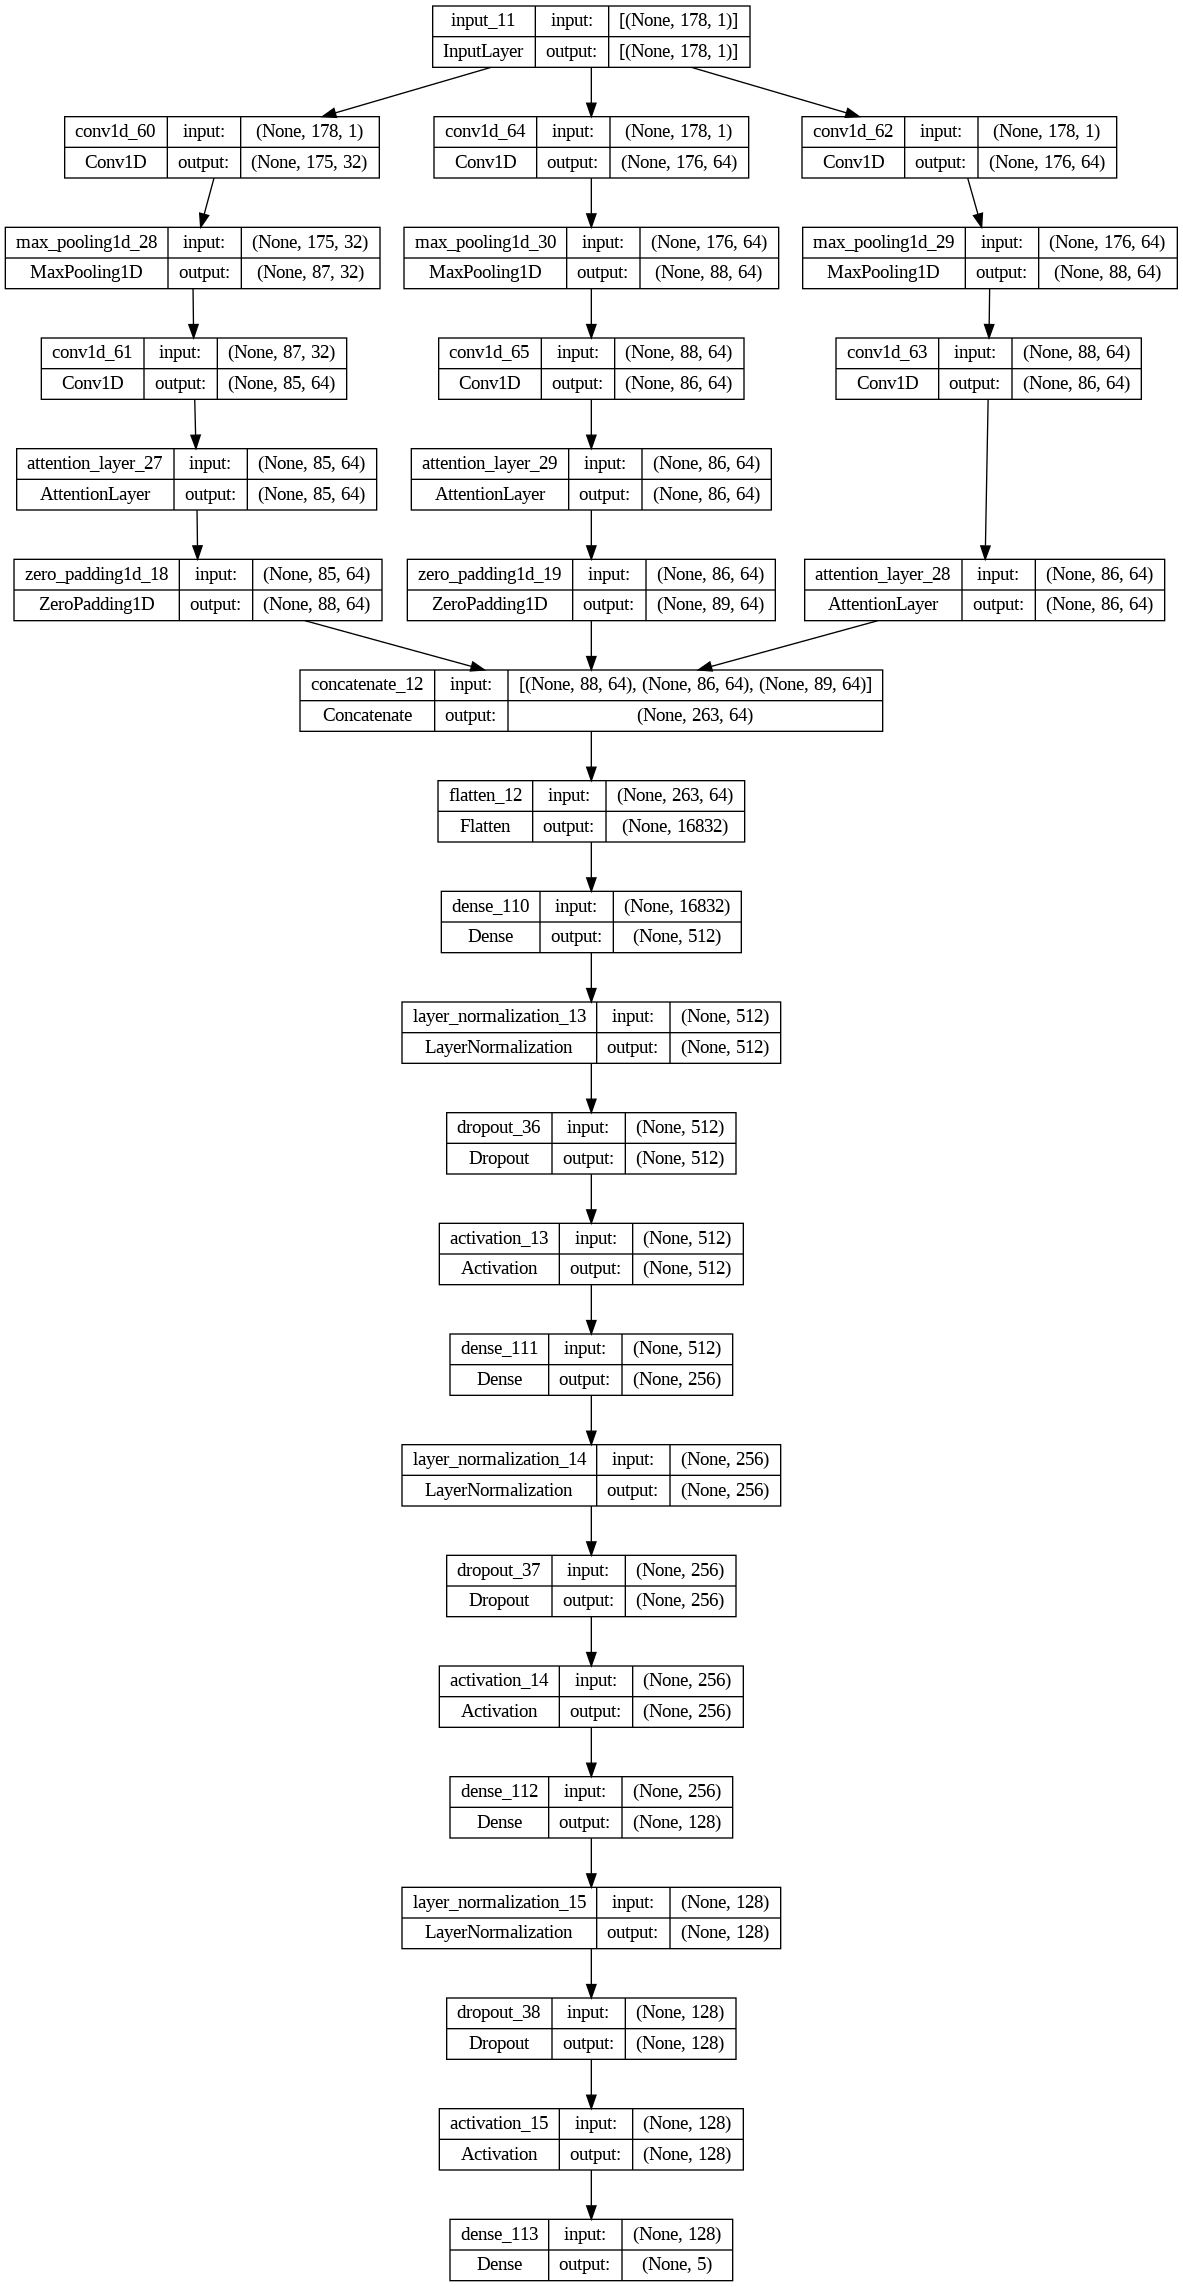

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
259/259 [==============================] - 70s 252ms/step - loss: 0.8432 - accuracy: 0.6173 - val_loss: 0.5664 - val_accuracy: 0.7386
Epoch 2/50
259/259 [==============================] - 65s 253ms/step - loss: 0.6257 - accuracy: 0.7036 - val_loss: 0.5540 - val_accuracy: 0.7391
Epoch 3/50
259/259 [==============================] - 68s 262ms/step - loss: 0.5928 - accuracy: 0.7199 - val_loss: 0.5068 - val_accuracy: 0.7585
Epoch 4/50
259/259 [==============================] - 66s 254ms/step - loss: 0.5513 - accuracy: 0.7336 - val_loss: 0.5414 - val_accuracy: 0.7507
Epoch 5/50
259/259 [==============================] - 65s 250ms/step - loss: 0.5359 - accuracy: 0.7477 - val_loss: 0.5546 - val_accuracy: 0.7478
Epoch 6/50
259/259 [==============================] - 64s 249ms/step - loss: 0.5258 - accuracy: 0.7529 - val_loss: 0.4947 - val_accuracy: 0.7802
Epoch 7/50
259/259 [==============================] - 67s 259ms/step - loss: 0.5189 - accuracy: 0.7545 - val_loss: 0.4749 - val_ac

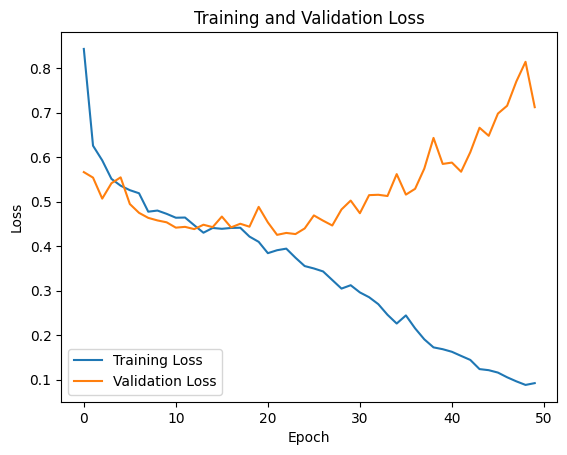

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/50
195/195 [==============================] - 108s 516ms/step - loss: 1.0742 - accuracy: 0.5132 - val_loss: 0.7810 - val_accuracy: 0.6499
Epoch 2/50
195/195 [==============================] - 99s 507ms/step - loss: 0.6871 - accuracy: 0.6778 - val_loss: 0.6439 - val_accuracy: 0.7050
Epoch 3/50
195/195 [==============================] - 98s 505ms/step - loss: 0.5969 - accuracy: 0.7163 - val_loss: 0.6051 - val_accuracy: 0.7174
Epoch 4/50
195/195 [==============================] - 100s 511ms/step - loss: 0.5007 - accuracy: 0.7717 - val_loss: 0.5844 - val_accuracy: 0.7356
Epoch 5/50
195/195 [==============================] - 103s 530ms/step - loss: 0.4003 - accuracy: 0.8212 - val_loss: 0.5606 - val_accuracy: 0.7752
Epoch 6/50
195/195 [==============================] - 97s 498ms/step - loss: 0.2961 - accuracy: 0.8739 - val_loss: 0.5705 - val_accuracy: 0.7984
Epoch 7/50
195/195 [==============================] - 98s 505ms/step - loss: 0.2168 - accuracy: 0.9155 - val_loss: 0.5832 - val

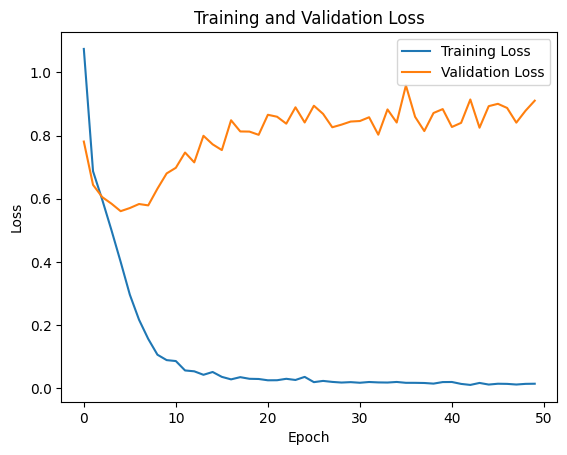

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

36/36 [==============================] - 2s 65ms/step - loss: 0.8216 - accuracy: 0.7809


[0.8215885758399963, 0.7808695435523987]

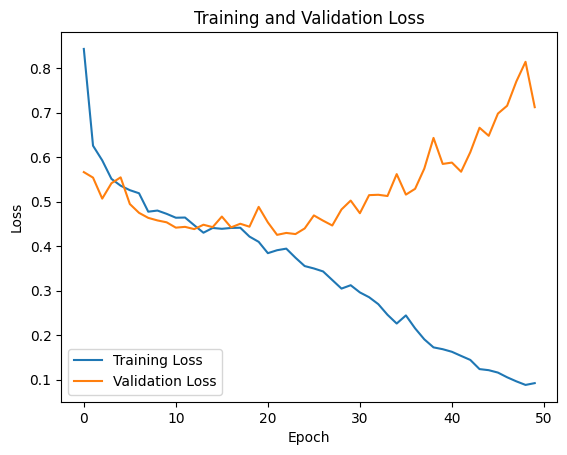

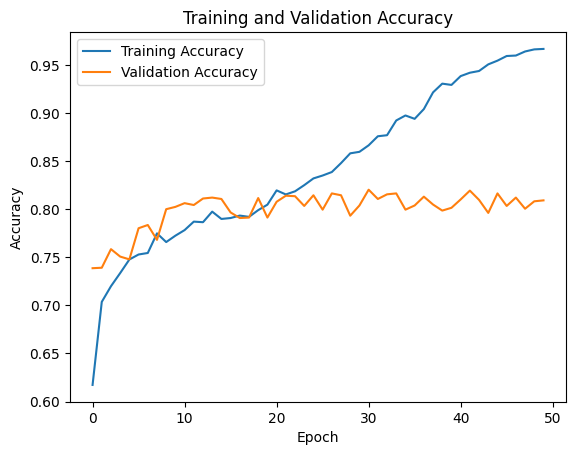

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
def denseBlock(dims,inp) :
    x = tf.keras.layers.BatchNormalization() (inp)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(178,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    return x

In [ ]:
inp = tf.keras.layers.Input(shape=(178,),name='input')
x1 = denseBlock(256,inp)
x2 = denseBlock(512,inp)
x3 = denseBlock(1024,inp)
x = tf.keras.layers.Concatenate()([x1,x2,x3])
x = tf.keras.layers.Dense(128,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
out = tf.keras.layers.Dense(1, activation='sigmoid',name='output') (x)

model = tf.keras.models.Model(inp,out)
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 178)]                0         []                            
                                                                                                  
 batch_normalization_12 (Ba  (None, 178)                  712       ['input[0][0]']               
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_13 (Ba  (None, 178)                  712       ['input[0][0]']               
 tchNormalization)                                                                                
                                                                                           

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 5)).


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

36/36 [==============================] - 1s 14ms/step - loss: 0.6364 - accuracy: 0.7296
Test Loss: 0.6364, Test Accuracy: 0.73%


In [ ]:
from keras.layers import Conv1D, MaxPool1D, Dropout, LSTM, Flatten, Dense, Input, Attention, Concatenate
from keras.models import Model

In [ ]:
model = Sequential()
model.add(Conv1D(256, 3, activation='relu', input_shape=(178, 1), padding='same'))
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu', padding='same'))
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_61 (Conv1D)          (None, 178, 256)          1024      
                                                                 
 max_pooling1d_30 (MaxPooli  (None, 89, 256)           0         
 ng1D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 89, 256)           0         
                                                                 
 conv1d_62 (Conv1D)          (None, 89, 128)           98432     
                                                                 
 max_pooling1d_31 (MaxPooli  (None, 44, 128)           0         
 ng1D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 44, 128)          

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5) and (None, 1) are incompatible


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/70
259/259 [==============================] - 41s 142ms/step - loss: 1.5537 - accuracy: 0.2722 - val_loss: 1.5288 - val_accuracy: 0.2922
Epoch 2/70
259/259 [==============================] - 39s 153ms/step - loss: 1.2339 - accuracy: 0.4471 - val_loss: 1.1044 - val_accuracy: 0.5113
Epoch 3/70
259/259 [==============================] - 35s 135ms/step - loss: 0.9407 - accuracy: 0.5698 - val_loss: 0.8977 - val_accuracy: 0.6026
Epoch 4/70
259/259 [==============================] - 35s 134ms/step - loss: 0.8089 - accuracy: 0.6271 - val_loss: 0.7540 - val_accuracy: 0.6626
Epoch 5/70
259/259 [==============================] - 35s 134ms/step - loss: 0.7598 - accuracy: 0.6525 - val_loss: 0.7419 - val_accuracy: 0.6661
Epoch 6/70
259/259 [==============================] - 35s 134ms/step - loss: 0.7087 - accuracy: 0.6733 - val_loss: 0.6542 - val_accuracy: 0.7165
Epoch 7/70
259/259 [==============================] - 34s 133ms/step - loss: 0.6758 - accuracy: 0.6903 - val_loss: 0.6196 - val_ac

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout, Flatten, Dense

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        return context_vector

def custom_model(x):
    x = Conv1D(256, 3, activation='relu', input_shape=(178,1), padding='same')(x)
    x = MaxPool1D(2)(x)
    x = Dropout(0.2)(x)
    attention_output_1 = AttentionLayer(units=128)(x)

    # Add encoder layers
    x = Conv1D(128, 3, activation='relu', padding='same')(attention_output_1)
    x = MaxPool1D(2)(x)
    x = Dropout(0.2)(x)

    x = Flatten()(x)
    x = Dense(250, activation='relu')(x)
    x = Dense(5, activation='softmax')(x)
    return x

# Define the input shape
input_shape = (178, 1)
inputs = tf.keras.layers.Input(shape=input_shape)

# Build the model
outputs = custom_model(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 178, 1)]          0         
                                                                 
 conv1d_22 (Conv1D)          (None, 178, 256)          1024      
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 89, 256)           0         
 ng1D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 89, 256)           0         
                                                                 
 attention_layer_15 (Attent  (None, 89, 256)           33025     
 ionLayer)                                                       
                                                                 
 conv1d_23 (Conv1D)          (None, 89, 128)           9843

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=0, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Epoch 1/50
259/259 [==============================] - 32s 115ms/step - loss: 0.9210 - accuracy: 0.6269 - val_loss: 0.5589 - val_accuracy: 0.7435
Epoch 2/50
259/259 [==============================] - 30s 115ms/step - loss: 0.5733 - accuracy: 0.7341 - val_loss: 0.4963 - val_accuracy: 0.7635
Epoch 3/50
259/259 [==============================] - 28s 107ms/step - loss: 0.5133 - accuracy: 0.7609 - val_loss: 0.4517 - val_accuracy: 0.7730
Epoch 4/50
259/259 [==============================] - 31s 118ms/step - loss: 0.4817 - accuracy: 0.7705 - val_loss: 0.4434 - val_accuracy: 0.7826
Epoch 5/50
259/259 [==============================] - 28s 108ms/step - loss: 0.4717 - accuracy: 0.7744 - val_loss: 0.4674 - val_accuracy: 0.7696
Epoch 6/50
259/259 [==============================] - 28s 110ms/step - loss: 0.4557 - accuracy: 0.7868 - val_loss: 0.4359 - val_accuracy: 0.7809
Epoch 7/50
259/259 [==============================] - 28s 109ms/step - loss: 0.4470 - accuracy: 0.7914 - val_loss: 0.4928 - val_ac

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, LayerNormalization, MultiHeadAttention, Add, Input, Embedding, GlobalAveragePooling1D

class TransformerLayer(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerLayer, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def custom_model_with_transformer(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(256, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling1D(2)(x)
    x = Dropout(0.2)(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = MaxPooling1D(2)(x)
    x = Dropout(0.2)(x)

    # Apply Transformer layer
    x = TransformerLayer(embed_dim=128, num_heads=2, ff_dim=128)(x)

    x = GlobalAveragePooling1D()(x)
    x = Dense(250, activation='relu')(x)
    outputs = Dense(5, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define the input shape
input_shape = (178, 1)

# Build the model
model = custom_model_with_transformer(input_shape)
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 178, 1)]          0         
                                                                 
 conv1d_24 (Conv1D)          (None, 178, 256)          1024      
                                                                 
 max_pooling1d_22 (MaxPooli  (None, 89, 256)           0         
 ng1D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 89, 256)           0         
                                                                 
 conv1d_25 (Conv1D)          (None, 89, 128)           98432     
                                                                 
 max_pooling1d_23 (MaxPooli  (None, 44, 128)           0         
 ng1D)                                                     

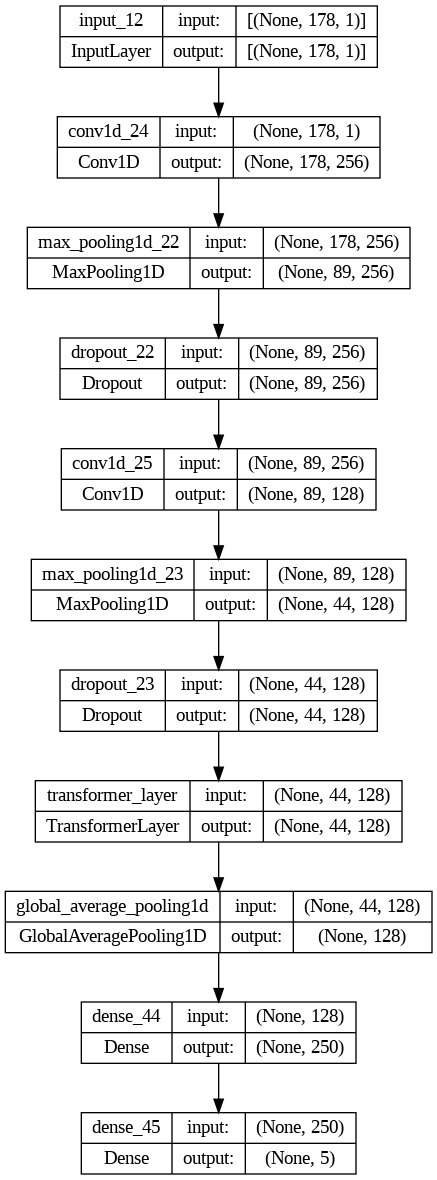

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
from keras.layers import Conv1D, MaxPool1D, Dropout, LSTM, Flatten, Dense, Input, Attention, Concatenate
from keras.models import Model

In [ ]:
model.evaluate(X_test,y_test)

36/36 [==============================] - 1s 14ms/step - loss: 0.6364 - accuracy: 0.7296


[0.6364486813545227, 0.7295652031898499]

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have your test data and true labels stored in test_data and true_labels respectively

# Assuming you have already compiled and trained your model and you have predictions stored in predicted_labels
# If not, you need to make predictions on your test data
predicted_labels = model.predict(X_test)

# Convert predicted labels to class indices (assuming one-hot encoded labels)
predicted_indices = np.argmax(predicted_labels, axis=1)

# Convert true labels to class indices (assuming one-hot encoded labels)
true_indices = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_indices, predicted_indices)

print("Confusion Matrix:")
print(conf_matrix)

90/90 [==============================] - 1s 8ms/step
Confusion Matrix:
[[539  21   3   5   0]
 [ 17 350 165   5  20]
 [  9 139 416   7  33]
 [  3   5   4 477  69]
 [  0  13  22  89 464]]


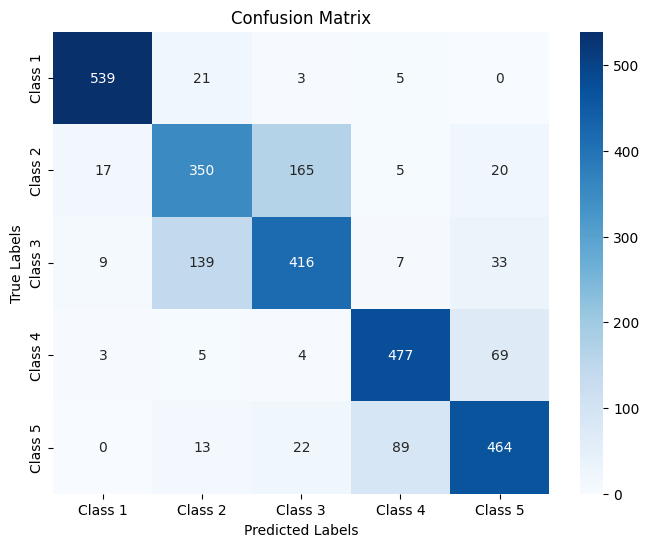

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already computed the confusion matrix as described in the previous code snippet

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### dwt

In [ ]:
pip install pywavelets

In [ ]:
import pywt

In [ ]:
# Choose a wavelet and level for the DWT
wavelet = 'db1'  # Replace with the desired wavelet
level = 5  # Replace with the desired level

In [ ]:
# Create an empty array to store the DWT coefficients
dwt_coefficients = np.zeros_like(X, dtype=np.float64)

In [ ]:
dwt_coefficients = np.zeros((len(X), 181))

In [ ]:
dwt_coefficients.shape

(11500, 181)

In [ ]:
print(dwt_coefficients)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Perform DWT using a for loop
for i in range(len(X)):
    row_vector = X[i, :]
    coeffs = pywt.wavedec(row_vector, wavelet, level=level)
    dwt_coefficients[i,:] = np.concatenate(coeffs)

In [ ]:
print(dwt_coefficients)

[[ 2.48901587e+02 -1.12606755e+02 -3.23324576e+02 ...  1.83847763e+01
  -7.77817459e+00 -2.26274170e+01]
 [-6.94732413e+01  6.00156881e+02  8.98202389e+02 ... -3.53553391e+00
   1.41421356e+00  9.89949494e+00]
 [-3.55674711e+02 -1.91449161e+02 -2.13546248e+02 ...  2.19203102e+01
   3.53553391e+00  7.07106781e-01]
 ...
 [ 2.02409316e+02  1.00055610e+02  4.08354166e+01 ...  3.53553391e+00
  -1.97989899e+01  4.94974747e+00]
 [-2.96631295e+02 -2.59861742e+02 -2.73296771e+02 ...  1.90918831e+01
   1.27279221e+01  2.82842712e+00]
 [ 1.37885822e+02 -1.59275802e+02 -7.68978625e+01 ... -2.12132034e+00
   4.24264069e+00 -1.27279221e+01]]


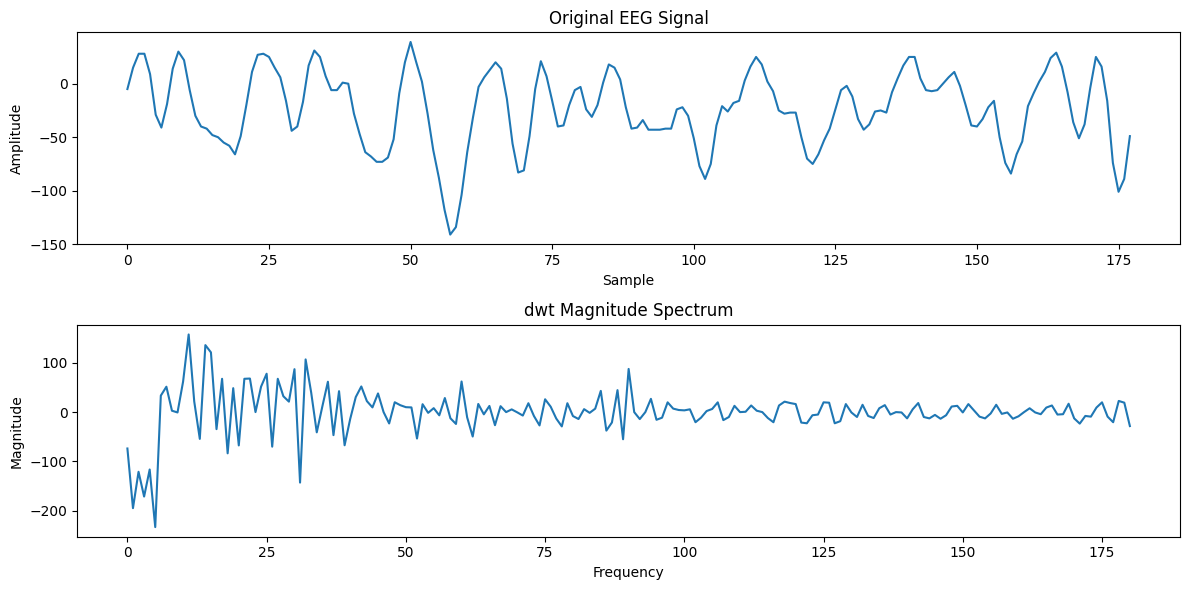

In [ ]:
# Plot the original signal and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(X[10,:],label='1')
plt.title('Original EEG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(dwt_coefficients[10,:], label=1)
plt.title('dwt Magnitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

In [ ]:
# Assuming tensor1 and tensor2 are your tensors of shape (11500, 178) and (11500, 181)
tensor1 = X
tensor2 = dwt_coefficients

# Determine the maximum number of columns
max_columns = max(tensor1.shape[1], tensor2.shape[1])

# Pad the tensors with zeros to make them have the same number of columns
padded_tensor1 = np.pad(tensor1, ((0, 0), (0, max_columns - tensor1.shape[1])))
padded_tensor2 = np.pad(tensor2, ((0, 0), (0, max_columns - tensor2.shape[1])))

# Now, you can add the padded tensors
result_tensor = padded_tensor1 + padded_tensor2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(result_tensor,y,test_size=0.25,shuffle=True)
X_train.shape,y_test.shape

((8625, 181), (2875, 1))

In [ ]:
# Reshape the data to comply with the 3D input shape expected by Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
y_train=y_train-1
y_test = y_test -1

In [ ]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Attention, Add
from tensorflow.keras import layers, models

class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        return context_vector

# Define the 1D CNN model with attention
input_layer = layers.Input(shape=(181, 1))
conv1d_layer = layers.Conv1D(32, kernel_size=4, activation='relu')(input_layer)
maxpooling_layer = layers.MaxPooling1D(pool_size=2)(conv1d_layer)
conv1d_layer2 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer)

# Apply attention layer after the 2nd step
attention_output = AttentionLayer(64)(conv1d_layer2)

# Concatenate attention output with the output of the 2nd convolutional layer
concatenated_output = layers.Concatenate(axis=1)([conv1d_layer2, attention_output])

# Additional layers
maxpooling_layer2 = layers.MaxPooling1D(pool_size=2)(concatenated_output)
conv1d_layer3 = layers.Conv1D(64, kernel_size=3, activation='relu')(maxpooling_layer2)
global_avg_pooling_layer = layers.GlobalAveragePooling1D()(conv1d_layer3)
dense_layer = layers.Dense(64, activation='relu')(global_avg_pooling_layer)

# Add Dense layer of size 64 before the final output
dense_layer_64 = layers.Dense(64, activation='relu')(dense_layer)

# Final dense layer
dense_layer_64 = layers.Dense(32, activation='relu')(dense_layer_64)
output_layer = layers.Dense(5, activation='softmax')(dense_layer_64)

# Define the model
model = models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 181, 1)]             0         []                            
                                                                                                  
 conv1d_9 (Conv1D)           (None, 178, 32)              160       ['input_3[0][0]']             
                                                                                                  
 max_pooling1d_6 (MaxPoolin  (None, 89, 32)               0         ['conv1d_9[0][0]']            
 g1D)                                                                                             
                                                                                                  
 conv1d_10 (Conv1D)          (None, 87, 64)               6208      ['max_pooling1d_6[0][0]'

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
270/270 [==============================] - 10s 29ms/step - loss: 1.2310 - accuracy: 0.4474 - val_loss: 1.0335 - val_accuracy: 0.5558
Epoch 2/5
270/270 [==============================] - 6s 24ms/step - loss: 0.8870 - accuracy: 0.6028 - val_loss: 0.7952 - val_accuracy: 0.6282
Epoch 3/5
270/270 [==============================] - 11s 39ms/step - loss: 0.7322 - accuracy: 0.6635 - val_loss: 0.8798 - val_accuracy: 0.5920
Epoch 4/5
270/270 [==============================] - 10s 37ms/step - loss: 0.6697 - accuracy: 0.6841 - val_loss: 0.6337 - val_accuracy: 0.6963
Epoch 5/5
270/270 [==============================] - 7s 26ms/step - loss: 0.6374 - accuracy: 0.6934 - val_loss: 0.6654 - val_accuracy: 0.6845


In [ ]:
model.evaluate(X_test,y_test)

90/90 [==============================] - 1s 8ms/step - loss: 0.6654 - accuracy: 0.6845


[0.6653695702552795, 0.6845217347145081]

In [ ]:
# Assuming you have trained your model and stored it in the variable 'model'

# Extract the weights of the dense layer before softmax activation
dense_layer_weights = model.layers[-2].get_weights()[0]

# Transpose the weights to obtain the precision matrix
precision_matrix = dense_layer_weights.T

print("Precision Matrix Shape:", precision_matrix.shape)
print("Precision Matrix:", precision_matrix)

Precision Matrix Shape: (32, 64)
Precision Matrix: [[-0.10996622  0.14397477  0.38217464 ... -0.12742329  0.15390232
   0.1454641 ]
 [ 0.15878645  0.1435445  -0.38741875 ... -0.14688814 -0.25375202
  -0.08138365]
 [ 0.1741978  -0.06352948  0.01474897 ... -0.22585988 -0.21671642
  -0.21755606]
 ...
 [ 0.0319318  -0.07050902 -0.23735368 ... -0.0192585   0.05307746
   0.17463243]
 [ 0.1243614  -0.07769907  0.22365731 ... -0.20483077  0.06461704
   0.10995388]
 [ 0.06559518  0.20806664  0.04254727 ...  0.07844776 -0.02224749
   0.15850006]]


Epoch 1/70
270/270 [==============================] - 8s 31ms/step - loss: 0.6281 - accuracy: 0.7043 - val_loss: 0.6769 - val_accuracy: 0.6783
Epoch 2/70
270/270 [==============================] - 7s 26ms/step - loss: 0.5973 - accuracy: 0.7206 - val_loss: 0.5969 - val_accuracy: 0.7183
Epoch 3/70
270/270 [==============================] - 7s 26ms/step - loss: 0.5863 - accuracy: 0.7237 - val_loss: 0.6534 - val_accuracy: 0.6863
Epoch 4/70
270/270 [==============================] - 8s 30ms/step - loss: 0.5691 - accuracy: 0.7319 - val_loss: 0.6016 - val_accuracy: 0.7165
Epoch 5/70
270/270 [==============================] - 7s 27ms/step - loss: 0.5707 - accuracy: 0.7374 - val_loss: 0.5914 - val_accuracy: 0.7050
Epoch 6/70
270/270 [==============================] - 8s 28ms/step - loss: 0.5661 - accuracy: 0.7289 - val_loss: 0.5706 - val_accuracy: 0.7283
Epoch 7/70
270/270 [==============================] - 7s 27ms/step - loss: 0.5473 - accuracy: 0.7445 - val_loss: 0.6118 - val_accuracy: 0.7172

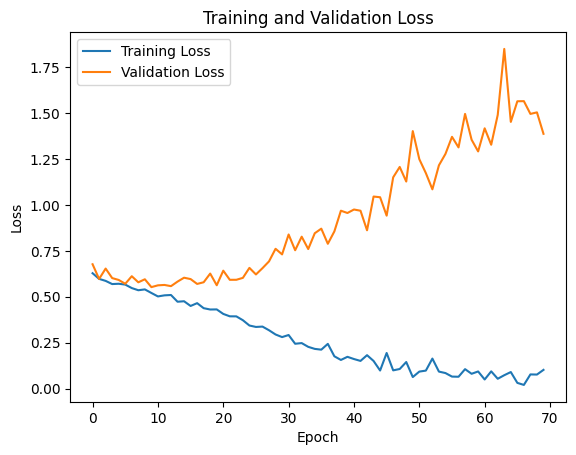

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and stored the history object
history = model.fit(X_train, y_train, epochs=70, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have your test data and true labels stored in test_data and true_labels respectively

# Assuming you have already compiled and trained your model and you have predictions stored in predicted_labels
# If not, you need to make predictions on your test data
predicted_labels = model.predict(X_test)

# Convert predicted labels to class indices (assuming one-hot encoded labels)
predicted_indices = np.argmax(predicted_labels, axis=1)

# Convert true labels to class indices (assuming one-hot encoded labels)
true_indices = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_indices, predicted_indices)

print("Confusion Matrix:")
print(conf_matrix)

90/90 [==============================] - 1s 7ms/step
Confusion Matrix:
[[525   6   0   0   0]
 [ 20 404 127   8  23]
 [ 11 210 323  14  29]
 [ 24  21  28 437  79]
 [  0  50  45 100 391]]


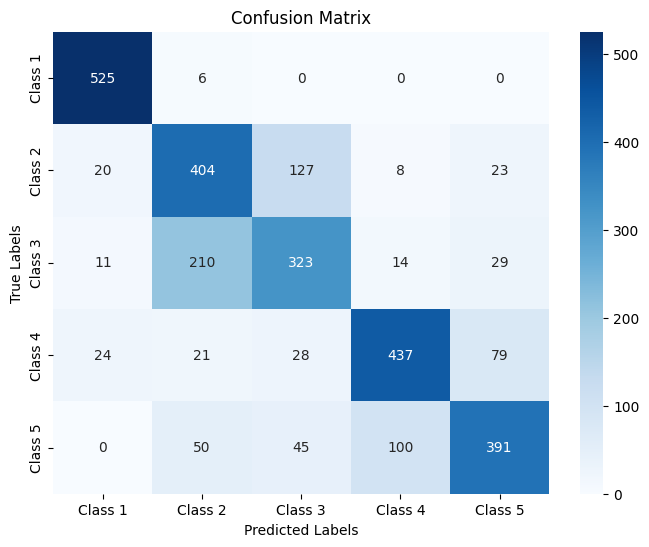

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already computed the confusion matrix as described in the previous code snippet

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

90/90 [==============================] - 1s 8ms/step - loss: 1.3870 - accuracy: 0.7235


[1.387039065361023, 0.7234782576560974]